Having a good understanding on how things work can help us quickly home in on the appropriate model: the right training algorithm to use, a good set of hyperparameters, etc.

## Linear Regression
Two ways to train:
* "closed-form": directly compute the model parameters that best fit the model to the training set
* iterative optimization approach called Gradient Descent that tweaks model parameters to minimize the ocst function over the training set
* makes a prediction by simply computing a weighted sum of the input features plus a constant called bias term

Model: Linear Regression \begin{equation} \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n  \end{equation}
* $\hat{y}$ : the predicted value
* n : the number of features
* $x_i$ : the $i^{th}$ feature value
* $\theta_j$ : the $j^{th}$ model parameter

Vectorized Form:
\begin{equation}
\hat{y} = h_{\theta}(x) = \theta x
\end{equation}

To train the linear regression model, we need to use a cost function to find values for the parameters that minimizes the performance metric.

Cost Function: Mean Squared Error (MSE)
\begin{equation}
MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{(i)})
\end{equation}

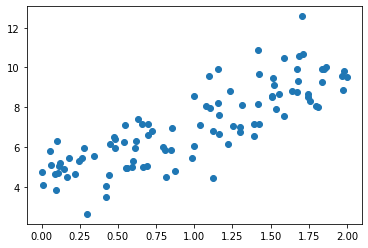

In [ ]:
# Generating linear data

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)

In [ ]:
# Computing theta using Normal Equation

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.28139549],
       [2.79529461]])

In [ ]:
# Making predictions

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.28139549],
       [9.8719847 ]])

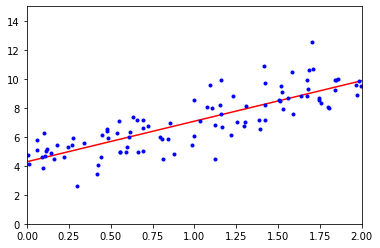

In [ ]:
# Plot the model's prediction

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# Using Scikit-Learn's Linear Regression 

## Import
from sklearn.linear_model import LinearRegression

## Fitting the data
lin_reg = LinearRegression()
lin_reg.fit(X, y)

## Viewing the coefficients
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

## Predicting with new data
lin_reg.predict(X_new)

Intercept: [4.28139549]
Coefficients: [[2.79529461]]


array([[4.28139549],
       [9.8719847 ]])

The Moore-Penrose inverse (pseudoinverse) is computed by Singular Value Decomposition (SVD):
* a standard matrix factorization

## Gradient Descent
* generic optimization algorithm that tweaks parameters iteratively in order to minimize a cost function
* measures the local gradient of the error function with regard to parameter vector $\theta$ and goes in the direction of descending gradient when gradient is 0, minimum is reached
* start by random initialization of $\theta$
* improve it gradually, taking one step at a time, each step attempting to decrease cost function until algorithm converges to a minimum
* Gradient Descent is guaranteed to approach the global minimum
* search in the model's *parameter space* that minimizes the cost function

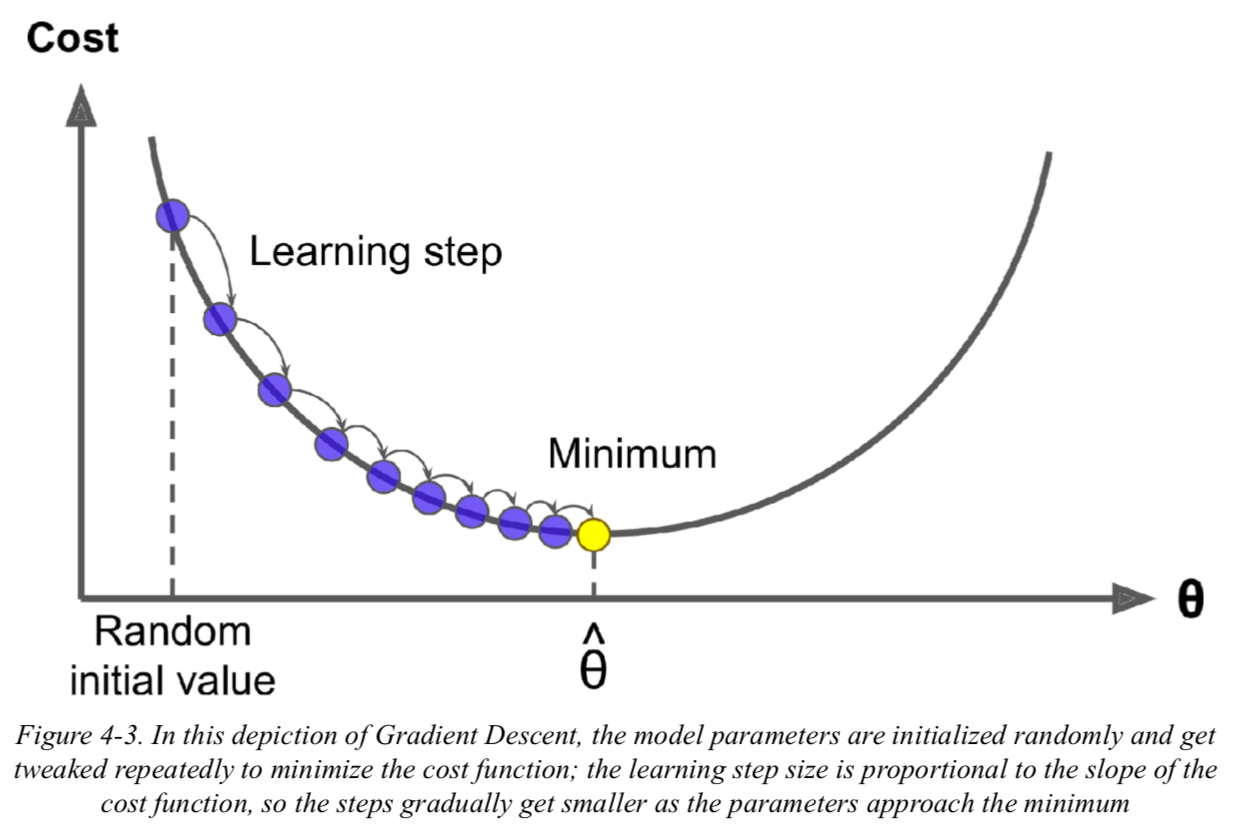

**learning_rate**: size of the learning steps 
* if learning rate is too small, then algorithm will have to go through many iterationsto converge
* if learning rate is too big, then algorithm might keep missing the minimum and jump to the other side of valley

MSE (cost function) is a convex function
* if we pick any two points on the curve, the line segment joining them never crosses the curve
* a continuous function with slope that never changes abruptly

### Batch Gradient Descent
uses the entire training set at each Gradient Descent step to see how much the cost function changes
* very slow with large data

In [ ]:
# Quick implementation of Batch Gradient Descent

## Setting the learning rate
eta = 0.1

## Setting the number of iterations
n_iterations = 1000

## Number of training observations
m = 100

## Setting the theta
theta = np.random.randn(2,1)

print(theta)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

[[1.29599315]
 [0.06520674]]


array([[4.28139549],
       [2.79529461]])

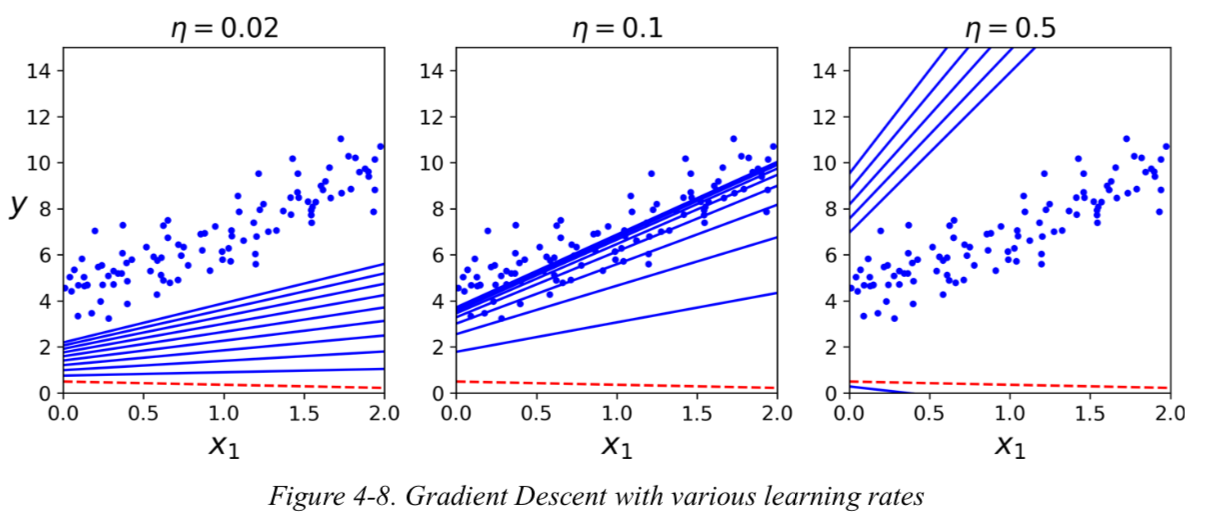

* The left has a learning rate that is too low. Eventually it will fit the data.
* The right has a learning rate too high. The fits are jumping all over the place
* The middle is just right. Was able to get a close fit with a few iterations

Can use grid search to find a good learning rate
* start with a very large number of iterations and interrupt algorithm when gradient vector becomes smaller than tolerance $\epsilon$

### Stochastic Gradient Descent
picks a random instance from the training set at every time step and computes the gradients based on the single instance
* faster than BGD
* cost function will flucuate, decreasing only on average
* when it gets close to minimum, it will never settle down and will keep bouncing around
* each training step is much faster but also much more stochastic than implementing BGD

Randomness can help with algorithm. It can jump out of local minimum. SGD has a better chance of finding global minimum than BGD. The only problem is that when it nears the global minimum, it won't settle down.

---

Solution:
- simulated annealing
* reduce learning rate as algorithm gets closer to minimum using a learning schedule

In [ ]:
# Implementation of SGD

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[4.28110538],
       [2.75501153]])

BGD iterated over 1,000 times, while SGD iterated only 50 times to get a decent result

In [ ]:
# Implementing using Scikit-Learn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
  max_iter=1000, # iterate 1000 times
  tol=1e-3, # stop if loss drops by less than 0.001
  penalty=None,
  eta0=0.1 # learning_rate
)

sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.35032006]), array([2.85970884]))

### Mini-Batch Gradient Descent
* computes the gradients on small random sets (mini-batches) at each step
* gets a performance boost from hardware optimization

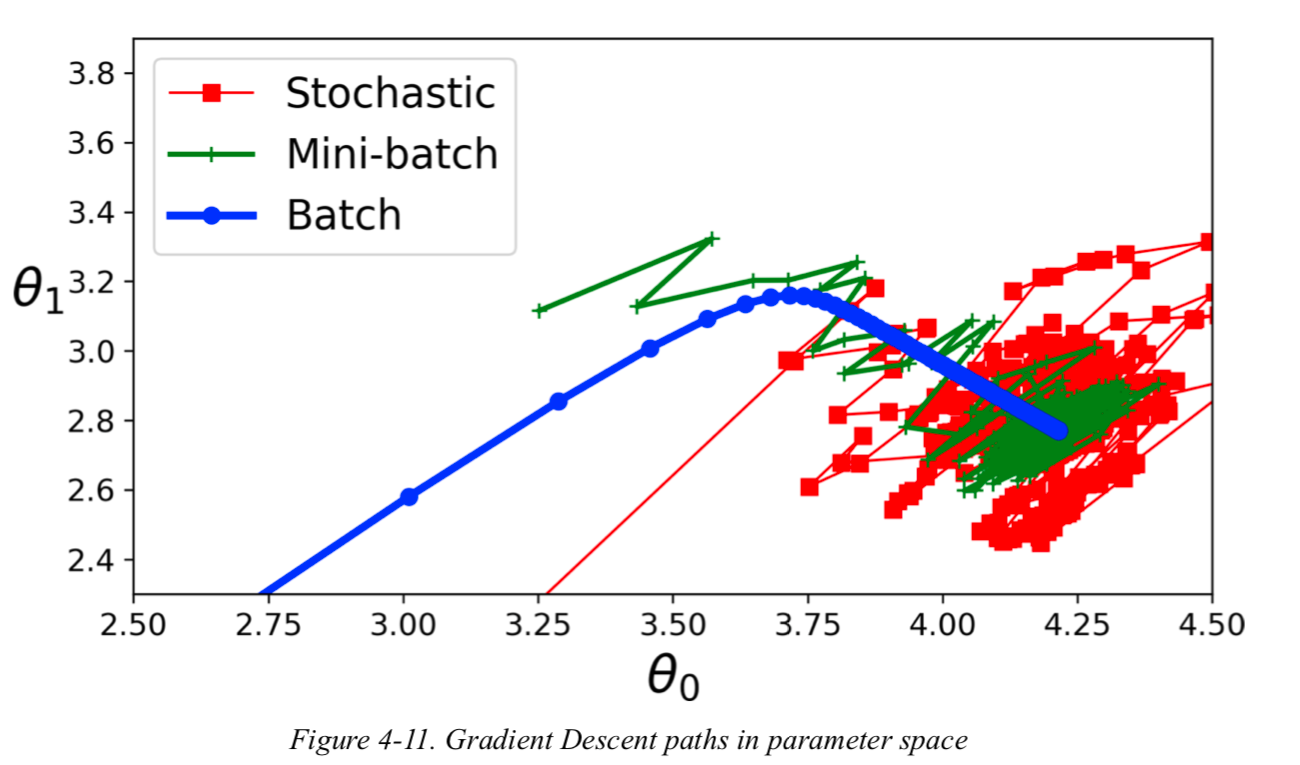

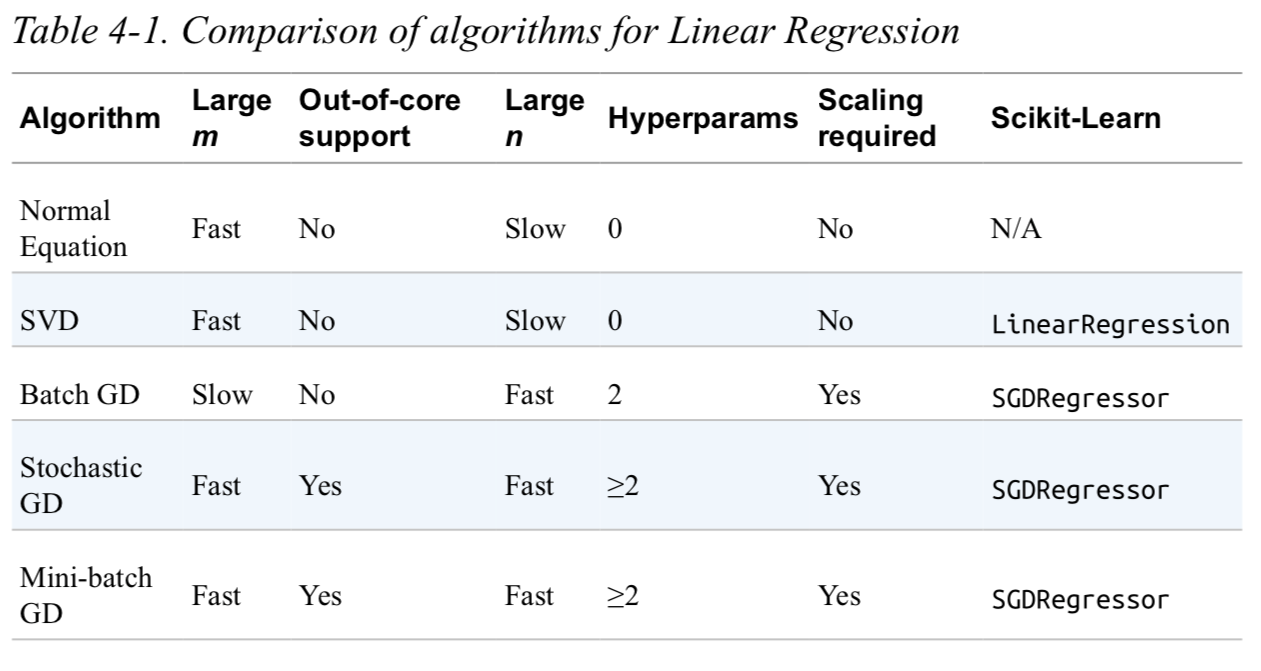

## Polynomial Regression
* add powers to features when data is not linear

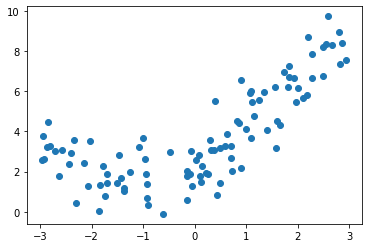

In [ ]:
# Nonlinear data

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.scatter(X, y)

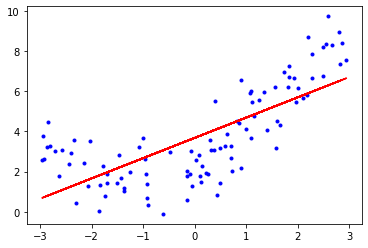

In [ ]:
# Fitting a Linear Regression on nonlinear data

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-')

In [ ]:
# Transforming the data with polynomials

## Import
from sklearn.preprocessing import PolynomialFeatures

## Applying polynomial transformation 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Viewing the data before and after transformation
print(f"raw data: {X[0]}")
print(f"transformed data: {X_poly[0]}")

raw data: [-2.71696096]
transformed data: [-2.71696096  7.38187687]


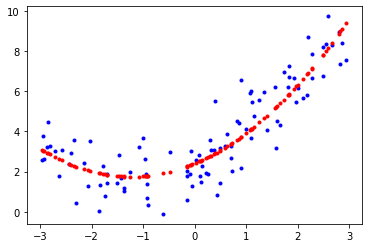

In [ ]:
# Fitting data using Polynomial Regression

lin_poly_reg = LinearRegression()
lin_poly_reg.fit(X_poly, y)
y_poly_pred = lin_poly_reg.predict(X_poly)
plt.plot(X, y, 'b.')
plt.plot(X, y_poly_pred, 'r.')

### Learning Curves
plots of the model performance on the training set and the validation set as a function of training set size
* train model several times on different sized subsets of the training set

In [ ]:
# Function that plots the learning curve of the model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  
  ## Splitting data into train and val set
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  
  ## Creating a list to save the train and val errors
  train_errors, val_errors = [], []
  
  ## Looping through each instance in train
  for m in range(1, len(X_train)):

    ### Fitting a model with m data
    model.fit(X_train[:m], y_train[:m])

    ### Predicting on m train data
    y_train_predict = model.predict(X_train[:m])

    ### Adding the train errors to the train_errors
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    
    ### Predicting on m val data
    y_val_predict = model.predict(X_val)
    
    ### Adding the val errors to the val_errors
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  ## Plotting the train errors  
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  
  ## Plotting the val errors
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

  ## Adding legend
  plt.legend()

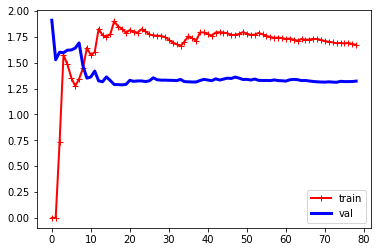

In [ ]:
# Plotting the learning curve

lr = LinearRegression()
plot_learning_curves(lr, X, y)

Takeaways:
* the model is underfitting
* with couple observations, the model learns the data well (train error) but cannot generalize on new data (val error)
* As more observations are added, training gets difficult but validation gets better
* plateaus after a certain training set size

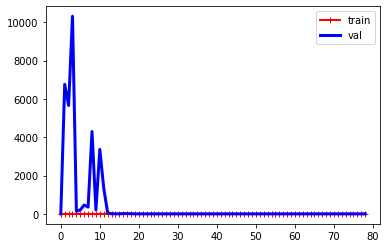

In [ ]:
# Fitting a polynomial regression

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Models
constrain the model to prevent overfitting

## Ridge Regression

\begin{equation} J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2\end{equation}




* the regularization term $ \alpha \sum_{i=1}^{n} \theta_i^2 $ is added to cost function (**l2 norm**)
* forces the learning algorithm to fit data and keep model weights as small as possible
* $\alpha$ = 0: Ridge --> Linear
* $\alpha$ is large: all weights end up close to zero, eventually flat lining at the data's mean
* bias term is not regularized

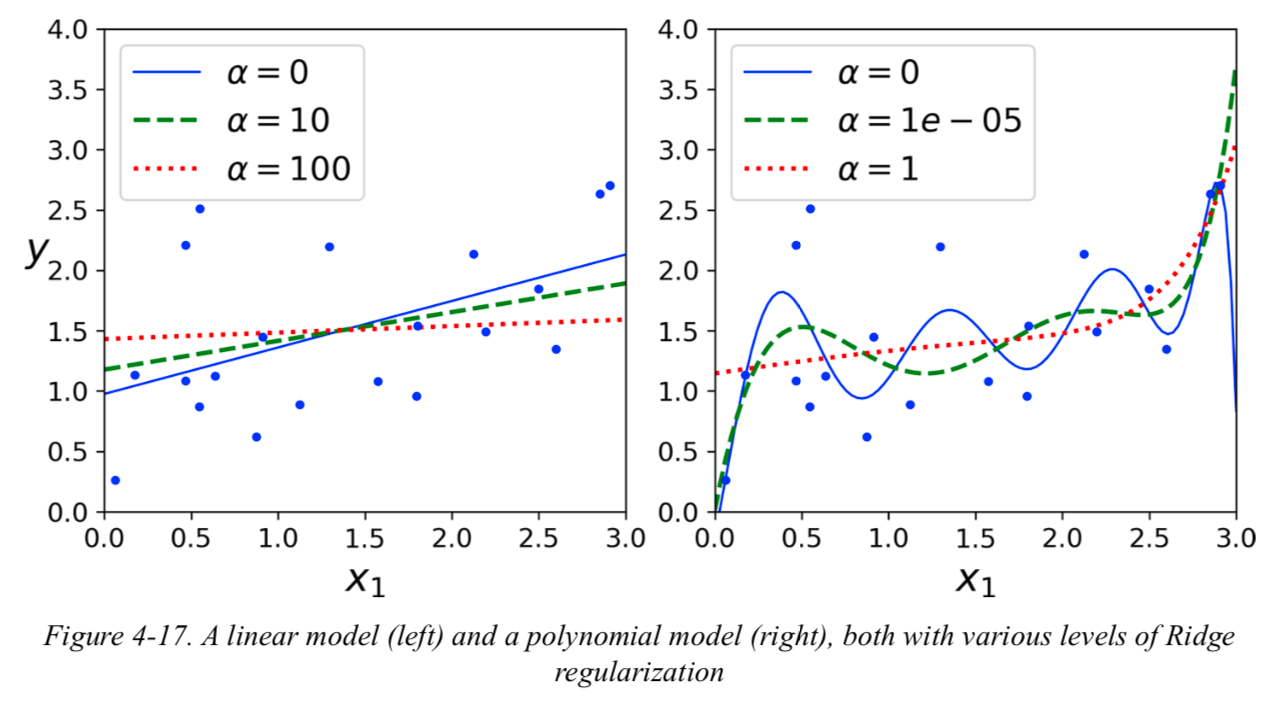

In [ ]:
# Implementing Ridge (L2 norm on Linear Regression)

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")

ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[5.18307668]])

In [ ]:
# Implementing Ridge using SGD

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15611886])

### Lasso Regression

\begin{equation} J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n}\lvert \theta_i \rvert \end{equation}

* Least Absolute Shrinkage and Selection Operator Regression
* uses a L1 norm to regularize Linear Regression
* sets weights to 0 if feature is not important
* outputs a sparse model

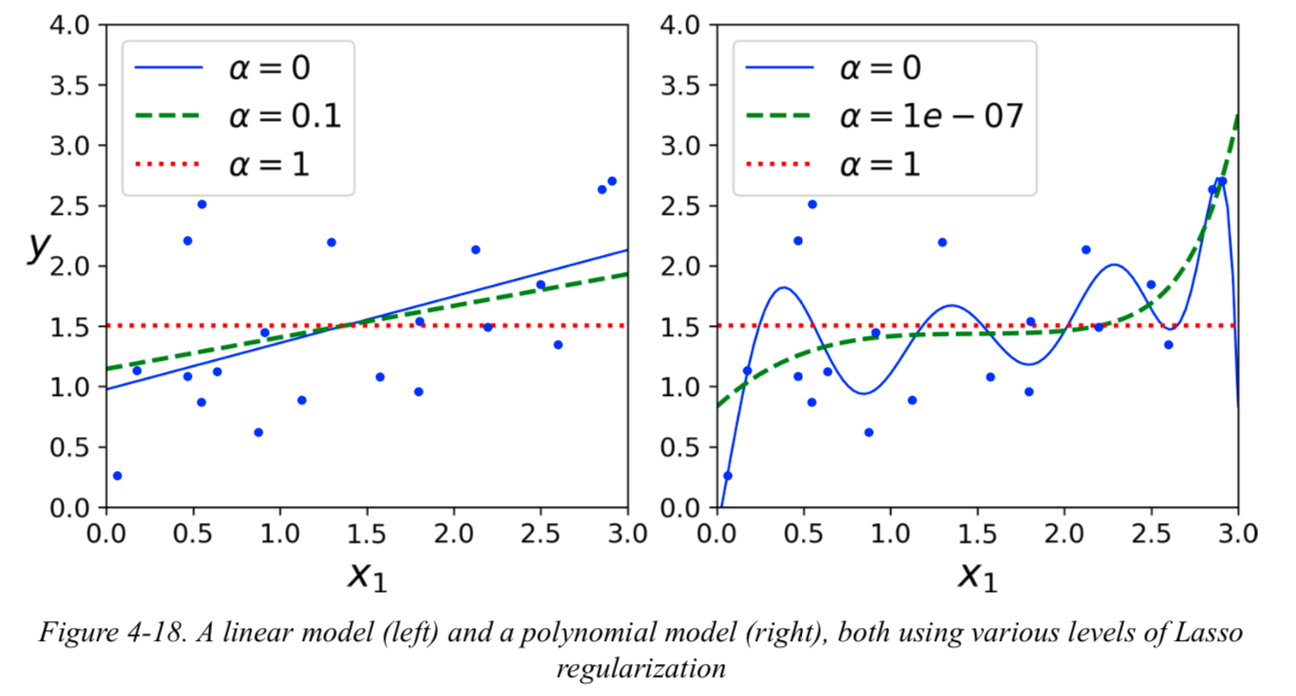

In [ ]:
# Implementing Lasso

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.13851036])

In [ ]:
# Implementing Ridge using SGD

sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.17314267])

### Elastic Net

\begin{equation} J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}\lvert \theta_i \rvert + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2\end{equation}

* middle ground for Ridge and Lasso (use r to tweak between lasso and ridge) 
* if r == 0 --> Ridge 
* if r == 1 --> Lasso

Generally use regularization: 
* start with Ridge
* use Lasso or ElasticNet if there are features that might not be useful
* use Elastic over Lasso when number of features are greater than number of observations 

In [ ]:
# Implementing ElasticNet

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.13915541])

### Early Stopping
* different way to regularize learning algorithms such as Gradient Descent
* stop training as soon as the validation error reaches a minimum

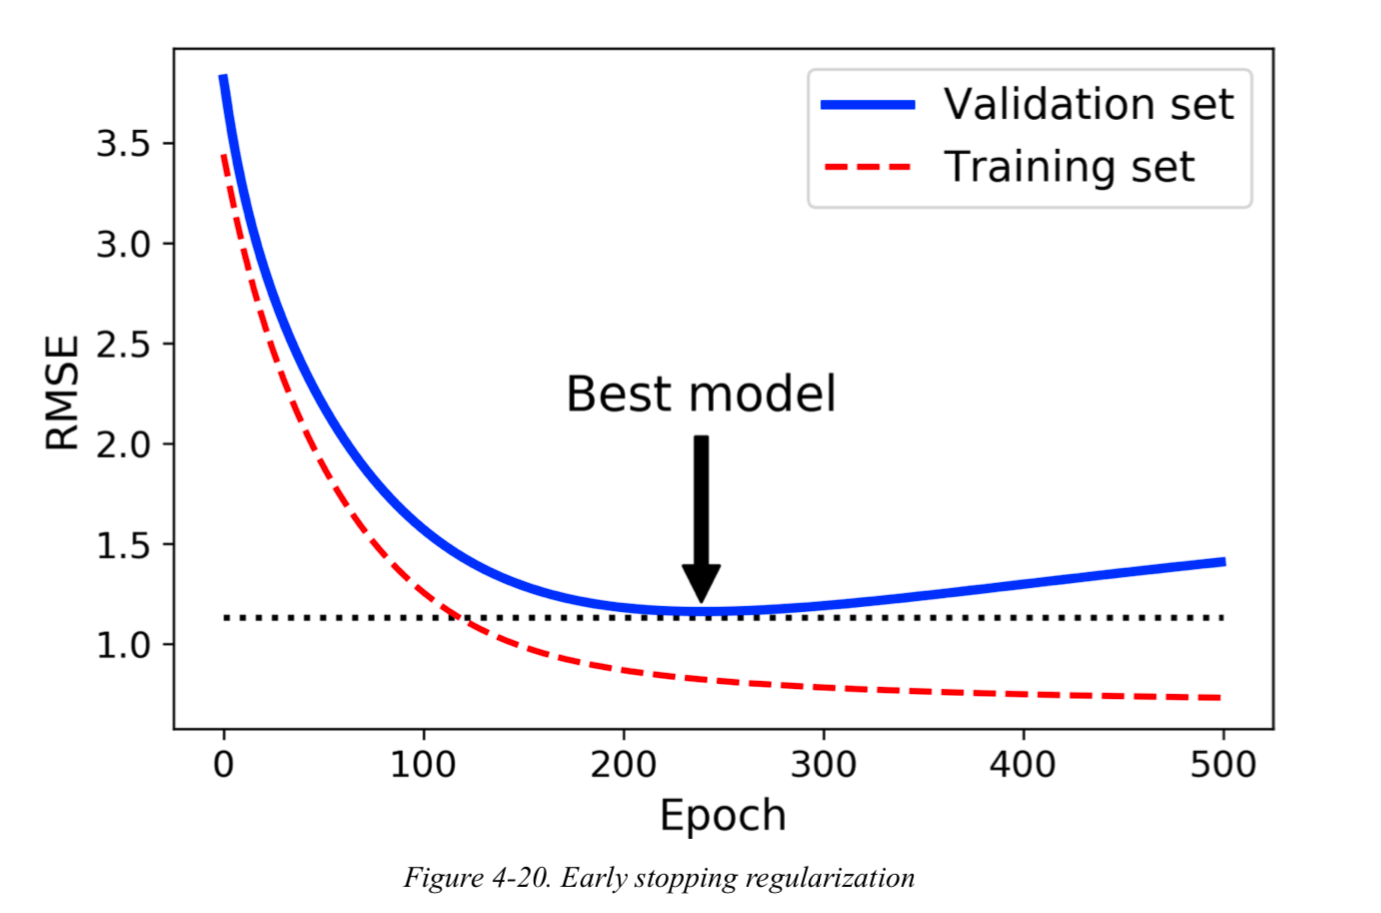

In [ ]:
# Implementation of Early Stopping

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

## Splitting data into train and val set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Preparing the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

## Transforming the data
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

## Fitting SGDRegressor
sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.inf,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
)

# ## Implementing Early Stopping
# minimum_val_error = float("inf")
# best_epoch = None
# best_model = None
# for epoch in range(1000):
#   sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off because warm_start=True
#   y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#   val_error = mean_squared_error(y_val, y_val_predict)
#   if val_error < minimum_val_error:
#     minimum_val_error = val_error
#     best_epoch = epoch
#     best_model = clone(sgd_reg)

## Logistic Regression
estimates the probability that an observation belongs to a particular class
\begin{equation} \hat{p} = h_\theta(x) = \sigma(x^T\theta) \end{equation}
* $ \sigma $: sigmoid function that outputs value between 0 and 1
* threshold is usually .5; if prob is higher than .5 it belongs to the positive class

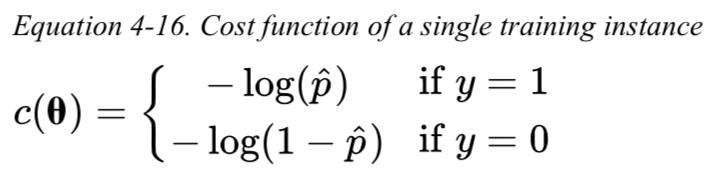

* $-\log{t}$ grows very large when t approaches 0
* $-\log{t}$ is close to 0 when t is close to 1

\begin{equation} J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{[y^{(i)}\log{\hat{p}^{(i)}+(1-\hat{y}^{(i)}})\log{(1-\hat{p}^{(i)})}]} \end{equation}

* log loss: average cost over all the training observations

### Decision Boundaries

In [ ]:
# Creating decision boundaries using iris dataset

## Imports
from sklearn import datasets

## Loading the dataset
iris = datasets.load_iris()

## Viewing the keys
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
# Extracting the features and target

## Using the petal width as the feature
X = iris['data'][:, 3:]

## Label virginica as 1 and 0 otherwise
y = (iris['target'] == 2).astype(np.int)

In [ ]:
# Fitting a Logistic Model

## Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

## Fitting a LR model
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(0.0, 3.0, -0.02, 1.02)

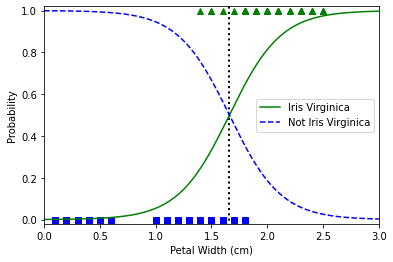

In [ ]:
# Visualizing the model's estimated probabilities

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris Virginica")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 3, -0.02, 1.02])

* Iris virginica's petal width ranges from 1.4 cm - 2.5 cm
* Above 2 cm, the classifier is highly confident that flower is virginica
* Below 1 cm, classifier is highly confident that it is NOT virginica

(2.9, 7.0, 0.8, 2.7)

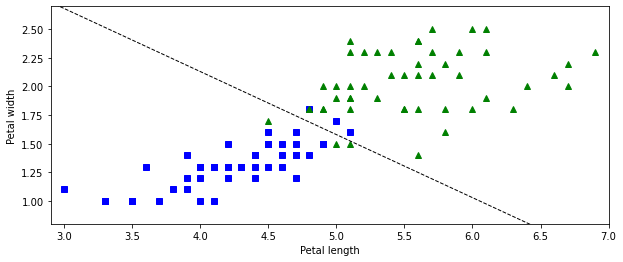

In [ ]:
# Using two features

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])

### Softmax Regression
* Multinomial Logistic Regression
* Logistic Regression is generalized to support mulitple classes 
* first computes a score $s_k(x)$ for each class k
* estimates the probability of each class by applying softmax function (normalized expotential) to the scores

\begin{equation} s_k(x) = x^T\theta^{(k)} \end{equation}

* each class has its own dedicated parameter vector $\theta^{(k)}$
* estimate the probability $\hat{p}_k$ that the instance belongs to class k using softmax function



Softmax Function

\begin{equation} \hat{p}_k = \sigma(s(x))_k = \frac{\exp{s_k(x)}}{\sum_{j=1}^{K}\exp(s_j(x))}
\end{equation}
* K : number of classes
* s(x) : vector containing the scores of each class for observation x
* $\sigma(s(x))_k$ : the estimated probability that the instance x belongs to class k, given the scores of each class for that observation

Softmax Regression classifier prediction

\begin{equation} \hat{y} = {argmax}_k  \sigma(s(x))_k = {argmax}_k s_k(x) = {argmax}_k ({(\theta^{(k)})^Tx}
\end{equation}

Cross Entropy
* used to minimize cost function

\begin{equation} J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} {y_k}^{(i)} * \log{{\hat{p}_k}^{(i)}}
\end{equation}

* ${y_k}^{(i)}$ : target probability that the $i^{th}$ observation belongs to class k

In [ ]:
# Fitting Softmax Regression

## Getting the data
X = iris['data'][:, (2,3)]
y = iris['target']

## Creating LR object
softmax_reg = LogisticRegression(
  multi_class='multinomial', # 'multinomial': switches to Softmax Regression
  solver='lbfgs', 
  C=10, # l2 regularization by default
)

## Fitting the model
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting on new data

print(f"Class prediction: {softmax_reg.predict([[5, 2]])}")
print(f"Probability for each class: {softmax_reg.predict_proba([[5, 2]])}")

Class prediction: [2]
Probability for each class: [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
